In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [170]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
train.shape

(891, 12)

In [172]:
test.shape

(418, 11)

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


 # Exploratory Data Analysis

In [175]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [176]:
(177/891)*100

19.865319865319865

19.8% of Age column is missing so we need to impute it as it is imortant to survival

In [177]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Data visualization

Percentage of females who have survived 74.20382165605095
Percentage of males who have survived 18.890814558058924


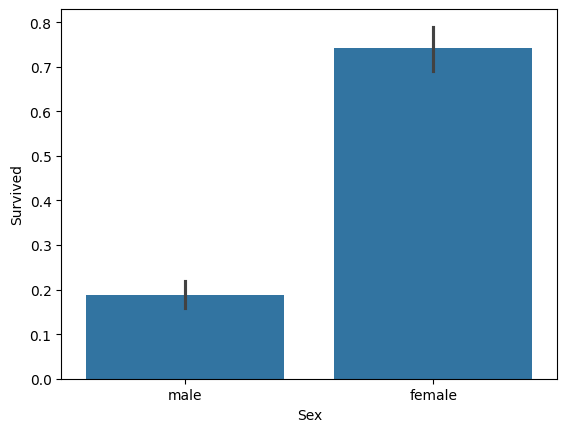

In [178]:
#Plot the survival of sex
sns.barplot(x ='Sex',y='Survived',data=train)

print('Percentage of females who have survived',train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)
print('Percentage of males who have survived',train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

In [179]:
train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


percentage of Pclass=1 survived 62.96296296296296
percentage of Pclass=2 survived 47.28260869565217
percentage of Pclass=3 survived 24.236252545824847


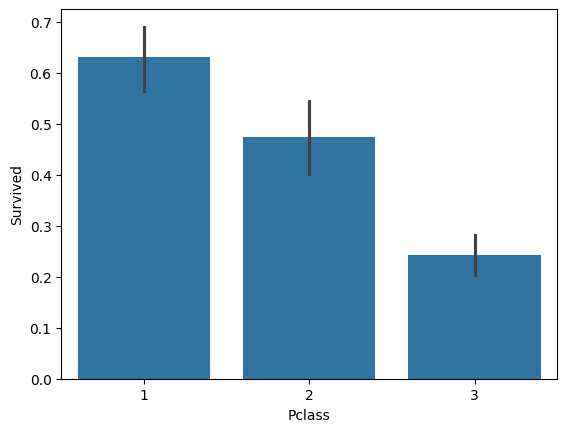

In [180]:
#Bar plot of survival of pclass
sns.barplot(x='Pclass',y='Survived',data=train)
print("percentage of Pclass=1 survived",train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print("percentage of Pclass=2 survived",train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print("percentage of Pclass=3 survived",train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

Percentage of SibSp=0 who survived 34.53947368421053
Percentage of SibSp=1 who survived 53.588516746411486
Percentage of SibSp=2 who survived 46.42857142857143


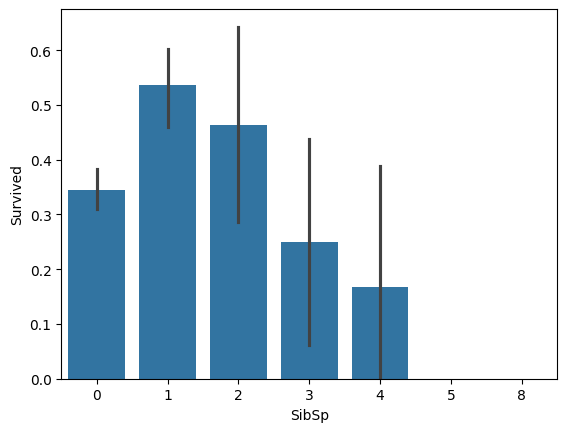

In [181]:
#Bar plot of Sibsp vs survival
sns.barplot(x='SibSp', y = "Survived",data=train)
# train['SibSp'].value_counts()
print('Percentage of SibSp=0 who survived',train['Survived'][train['SibSp'] == 0].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp=1 who survived',train['Survived'][train['SibSp'] == 1].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp=2 who survived',train['Survived'][train['SibSp'] == 2].value_counts(normalize=True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

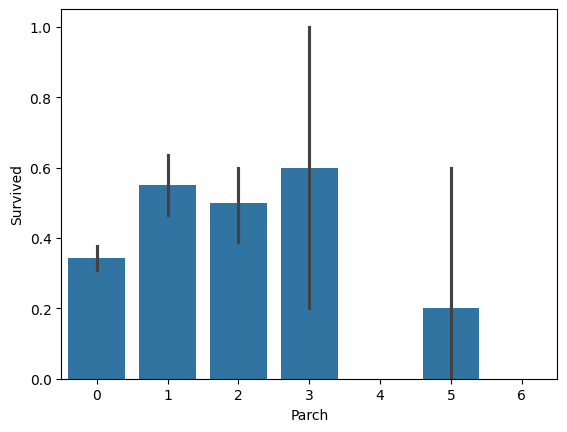

In [182]:
#Bar plot for parch vs survived
sns.barplot(x='Parch',y='Survived',data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

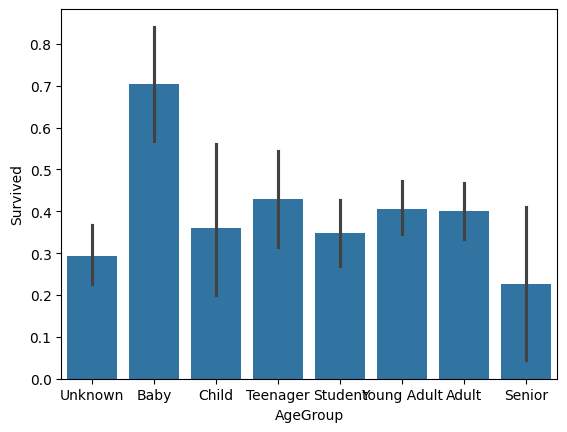

In [183]:
#Age Feature
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train['AgeGroup'] = pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels=labels)

sns.barplot(x='AgeGroup',y='Survived',data=train)
plt.show()

Babies are more likely to survive than any other age group.

In [184]:
train[train['Cabin'].notnull() == False].shape

(687, 13)

Percentage of CabinBool=0 Who Survived 29.985443959243085
Percentage of CabinBool=1 Who Survived 66.66666666666666


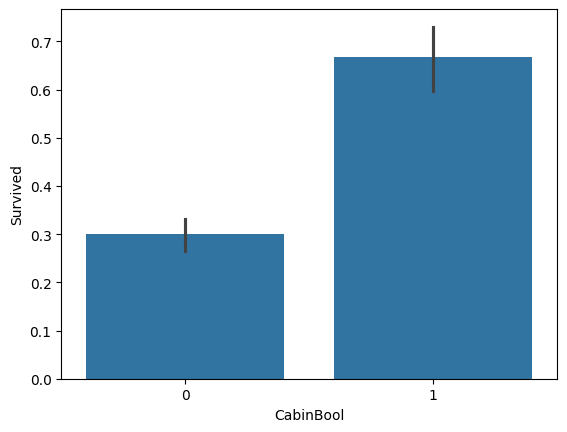

In [185]:
#Cabin Feature

train['CabinBool'] = (train['Cabin'].notnull().astype(int))
test['CabinBool'] = (test['Cabin'].notnull().astype(int))

print("Percentage of CabinBool=0 Who Survived",train["Survived"][train['CabinBool'] == 0].value_counts(normalize=True)[1]*100)
print("Percentage of CabinBool=1 Who Survived",train["Survived"][train['CabinBool'] == 1].value_counts(normalize=True)[1]*100)

sns.barplot(x='CabinBool',y='Survived', data=train)
plt.show()

People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)

##Data Cleaning

In [186]:

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinBool
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,23.941388,0.447368,0.392344,35.627188,0.217703
std,120.810458,0.841838,17.741080,0.896760,0.981429,55.907576,0.413179
min,892.000000,1.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,9.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [187]:
#we will drop off cabin frature
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [188]:
#we also drop Ticket Feature
train = train.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)

In [189]:
#Now we need to fill in the missing values of embarked feature
print("no.of people embarking in Southampton:",train[train['Embarked'] == 'S'].shape[0])
print("no.of people embarking in Cherboug:",train[train['Embarked'] == 'C'].shape[0])
print("no.of people embarking in Queenstown:",train[train['Embarked'] == 'Q'].shape[0])

no.of people embarking in Southampton: 644
no.of people embarking in Cherboug: 168
no.of people embarking in Queenstown: 77


So here clearly majority of the people are from Southampton so we are filling the missing values with it

In [190]:
train = train.fillna({'Embarked':"S"})

In [191]:
combine = [train,test]

#extracting a title for each name in train and test datasets
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [192]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [193]:
#map each of the title groups to a numerical value

title_mapping = {'Mr':1,'Miss':2,"Mrs":3,"Master":4,"Royal":5,"Rare":6}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [194]:
len(train['AgeGroup'])

891

In [195]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [196]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [197]:
#Name Feature
#We can drop the name feature now that we've extracted the titles.
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [198]:
#Sex Feature
#map each Sex value to a numerical value
sex_mapping = {'male':0,'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [199]:
#Embarked Feature

embarked_mapping = {'S':1,"C":2,"Q":3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [200]:
#Fare Feature
test[test["Fare"].isnull() == True]

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
152,1044,3,0,0,0,NaN,1,7.0,0,1


In [201]:
for x in range(len(test['Fare'])):
  if pd.isnull(test['Fare'][x]):
    pclass = test['Pclass'][x]
    test['Fare'][x] = round(train[train['Pclass'] == pclass]["Fare"].mean(),4)


train['FareBand'] = pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'],4,labels=[1,2,3,4])

#drop Fare Values
train = train.drop('Fare',axis=1)
test = test.drop('Fare',axis=1)

<ipython-input-201-577b42d93878>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][x] = round(train[train['Pclass'] == pclass]["Fare"].mean(),4)


In [202]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [203]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Embarked,0
AgeGroup,0
CabinBool,0
Title,0


In [204]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


In [205]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Embarked     418 non-null    int64   
 6   AgeGroup     418 non-null    float64 
 7   CabinBool    418 non-null    int64   
 8   Title        418 non-null    int64   
 9   FareBand     418 non-null    category
dtypes: category(1), float64(1), int64(8)
memory usage: 30.1 KB


#Choosing the Best Model

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train.drop(['Survived','PassengerId'],axis=1),train['Survived'],test_size=0.22,random_state=0)
#

##Testing Differnt Models

1. Gaussian Naive Bayes
2. Logistic Regression
3. Support Vector Machines
4. Perceptron
5. Decision Tree Classifier
6. Random Forest Classifier
7. KNN or k-Nearest Neighbors
8. Stochastic Gradient Descent
9. Gradient Boosting Classifier




In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)
acc_log = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_log)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

79.7
[[101  23]
 [ 17  56]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       124
           1       0.71      0.77      0.74        73

    accuracy                           0.80       197
   macro avg       0.78      0.79      0.79       197
weighted avg       0.80      0.80      0.80       197



In [226]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_val)
acc_sgd = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_sgd)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

78.68
[[91 33]
 [ 9 64]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       124
           1       0.66      0.88      0.75        73

    accuracy                           0.79       197
   macro avg       0.78      0.81      0.78       197
weighted avg       0.82      0.79      0.79       197



In [227]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred = decisiontree.predict(X_val)
acc_dt = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_dt)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

80.2
[[107  17]
 [ 22  51]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       124
           1       0.75      0.70      0.72        73

    accuracy                           0.80       197
   macro avg       0.79      0.78      0.78       197
weighted avg       0.80      0.80      0.80       197



In [228]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train,y_train)
y_pred = randomforest.predict(X_val)
acc_rf = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_rf)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

84.26
[[107  17]
 [ 14  59]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       124
           1       0.78      0.81      0.79        73

    accuracy                           0.84       197
   macro avg       0.83      0.84      0.83       197
weighted avg       0.84      0.84      0.84       197



In [235]:
from sklearn.ensemble import GradientBoostingClassifier
gbk= GradientBoostingClassifier()
gbk.fit(X_train,y_train)
y_pred = gbk.predict(X_val)
acc_gbk = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gbk)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

84.77
[[110  14]
 [ 16  57]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       124
           1       0.80      0.78      0.79        73

    accuracy                           0.85       197
   macro avg       0.84      0.83      0.84       197
weighted avg       0.85      0.85      0.85       197



In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_knn)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

82.23
[[108  16]
 [ 19  54]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       124
           1       0.77      0.74      0.76        73

    accuracy                           0.82       197
   macro avg       0.81      0.81      0.81       197
weighted avg       0.82      0.82      0.82       197



In [237]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_val)
acc_svc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_svc)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

78.17
[[98 26]
 [17 56]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       124
           1       0.68      0.77      0.72        73

    accuracy                           0.78       197
   macro avg       0.77      0.78      0.77       197
weighted avg       0.79      0.78      0.78       197



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [238]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train,y_train)
y_pred = perceptron.predict(X_val)
acc_perceptron = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_perceptron)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

78.68
[[97 27]
 [15 58]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       124
           1       0.68      0.79      0.73        73

    accuracy                           0.79       197
   macro avg       0.77      0.79      0.78       197
weighted avg       0.80      0.79      0.79       197



In [239]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_val)
acc_gaussian = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gaussian)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

78.68
[[90 34]
 [ 8 65]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       124
           1       0.66      0.89      0.76        73

    accuracy                           0.79       197
   macro avg       0.79      0.81      0.78       197
weighted avg       0.82      0.79      0.79       197



In [241]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC',
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_rf, acc_gaussian, acc_perceptron,acc_svc, acc_dt,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.77
3,Random Forest,84.26
1,KNN,82.23
7,Decision Tree,80.20
2,Logistic Regression,78.68
4,Naive Bayes,78.68
5,Perceptron,78.68
8,Stochastic Gradient Descent,78.68
0,Support Vector Machines,78.17
6,Linear SVC,78.17


In [243]:
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })

In [244]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
